In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загружаем изображение

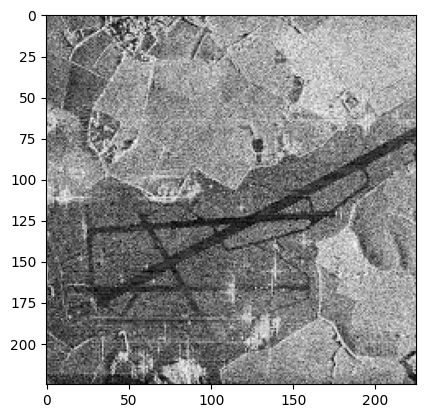

In [7]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

# Для изображения sar_3.jpg найти наиболее протяженный участок и выделить линии при помощи преобразования Хафа

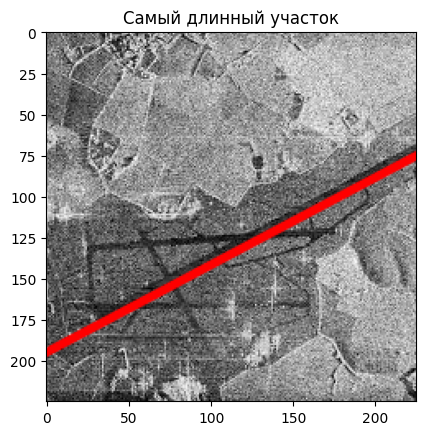

In [8]:
edges = cv2.Canny(image_gray, 100, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)
max_length = 0
longest_line = None
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        length = np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

if longest_line is not None:
    image_with_line = image.copy()
    cv2.line(image_with_line, longest_line[0], longest_line[1], (0, 0, 255), 3, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title('Самый длинный участок')
plt.show()

# Для изображения sar_3.jpg провести исследование алгоритмов бинаризации

Text(0.5, 1.0, 'Адаптивная бинаризации')

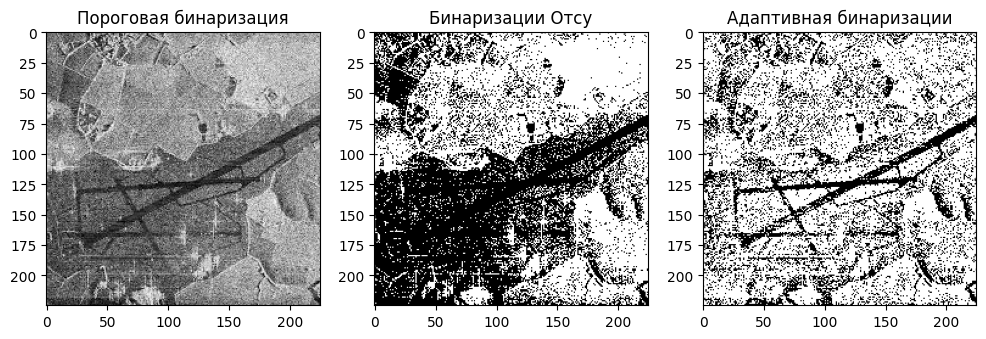

In [9]:
optimal_threshold, otsu_result = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_result = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 71, 21)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.title('Пороговая бинаризация')

plt.subplot(1, 3, 2)
plt.imshow(otsu_result, cmap="gray")
plt.title('Бинаризации Отсу')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_result, cmap="gray")
plt.title('Адаптивная бинаризации')

# Выделение участка дорожной полосы

Text(0.5, 1.0, 'Выделенные участки дороги')

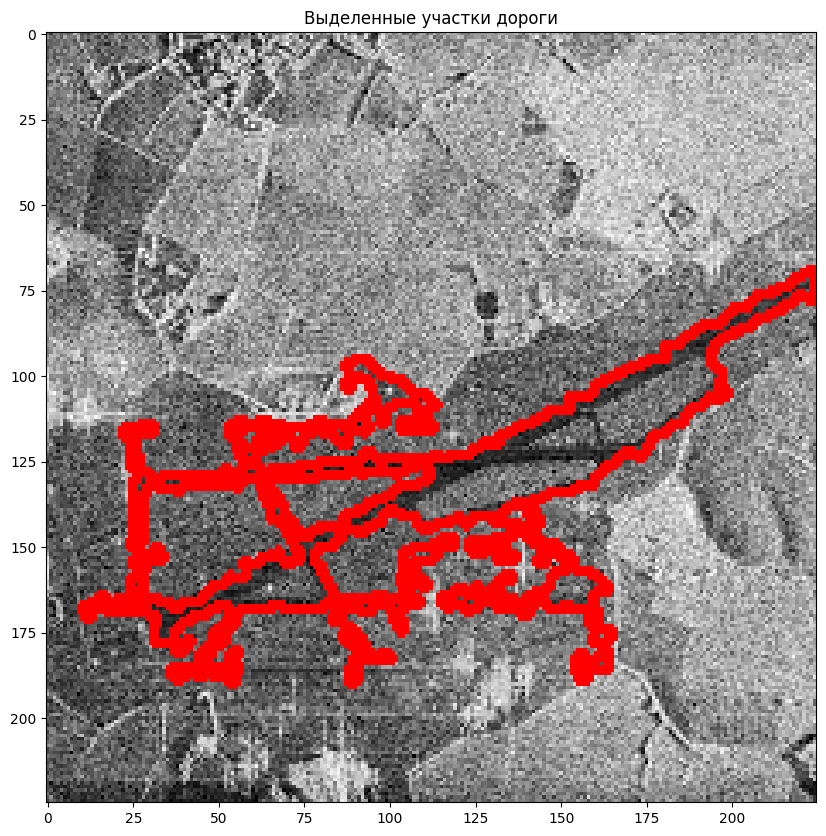

In [10]:
blurred = cv2.GaussianBlur(adaptive_result, (7, 7), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lane_image = image.copy()
if contours:
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:
            cv2.drawContours(lane_image, [contour], -1, (0, 0, 255), 2)  # Красный цвет

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.title('Выделенные участки дороги')